<a href="https://colab.research.google.com/github/surendra-crax/120Days-DataScience/blob/main/Day13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
upload = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.shape

(8807, 12)

In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [10]:
df["director"] = df["director"].fillna("Unknown")

In [11]:
df["director"].isnull().sum()

np.int64(0)

In [12]:
df["cast"] = df["cast"].fillna("Not available")

In [13]:
df["cast"].isnull().sum()

np.int64(0)

In [14]:
df["country"] = df["country"].fillna("Unknown")

In [15]:
df["country"].isnull().sum()

np.int64(0)

In [16]:
df["date_added"]=df["date_added"].fillna(df["date_added"].mode()[0])

In [17]:
df["date_added"] = df["date_added"].astype(str).str.strip()
df["date_added"] = pd.to_datetime(df["date_added"], format="mixed")


In [18]:
df["rating"] = df['rating'].fillna(df["rating"].mode()[0])

In [19]:
df["duration"] = df["duration"].fillna(df["duration"].mode()[0])

In [20]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [22]:
df["type"].value_counts()

,count
type,
Movie,6131
TV Show,2676


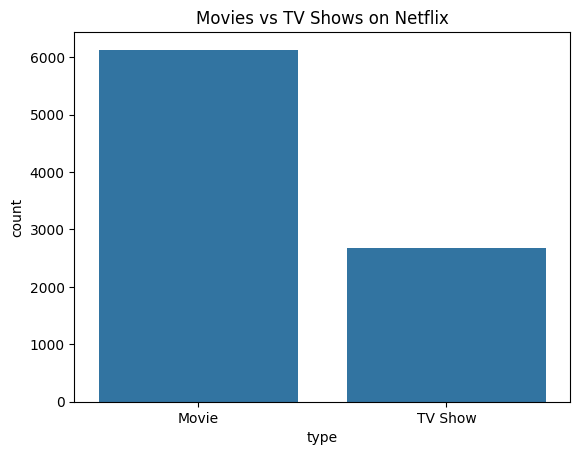

In [23]:
sns.countplot(data=df,x="type")
plt.title("Movies vs TV Shows on Netflix")
plt.show()

#> Movies are more in netflix so that mean netflix is more focussing on single-sitting content
#> Imbalanced cuz Movie has almost count of 6131 and TV show has 2676 count.

In [24]:
df["rating"].value_counts()

,count
rating,
TV-MA,3211
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


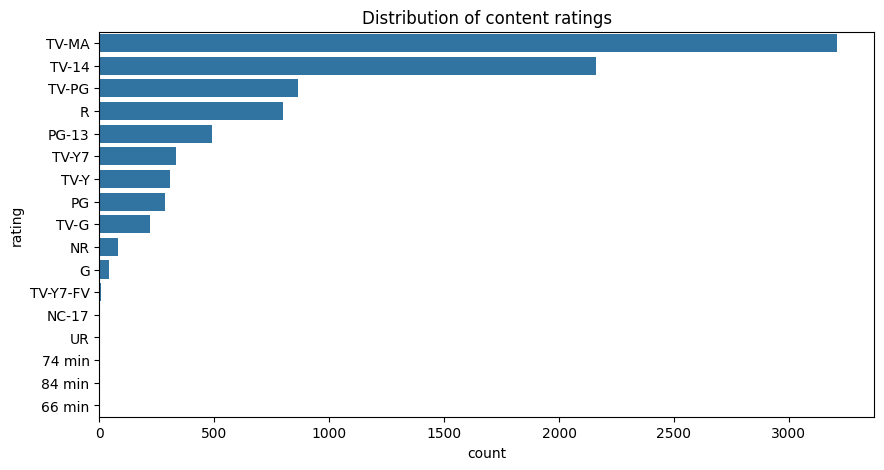

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,y="rating",order=df["rating"].value_counts().index)
plt.title("Distribution of content ratings")
plt.show()

**Q1: What is the most common rating?**

Usually:

TV-MA = adult content

TV-14 = teen content
If Netflix has many TV-MA shows → adult audience focus.

**Q2: Are kid-friendly ratings rare?**

If TV-Y, TV-Y7, PG, G are low → Netflix has limited children content.

**Q3: Are there messy categories?**

Examples:

"NR" or "Not Rated"

"UR" (Unrated)
These may need grouping later.

In [26]:
df["main_country"] = df["country"].str.split(",").str[0]

In [27]:
df["main_country"].value_counts().head(10)

,count
main_country,
United States,3211
India,1008
Unknown,831
United Kingdom,628
Canada,271
Japan,259
France,212
South Korea,211
Spain,181


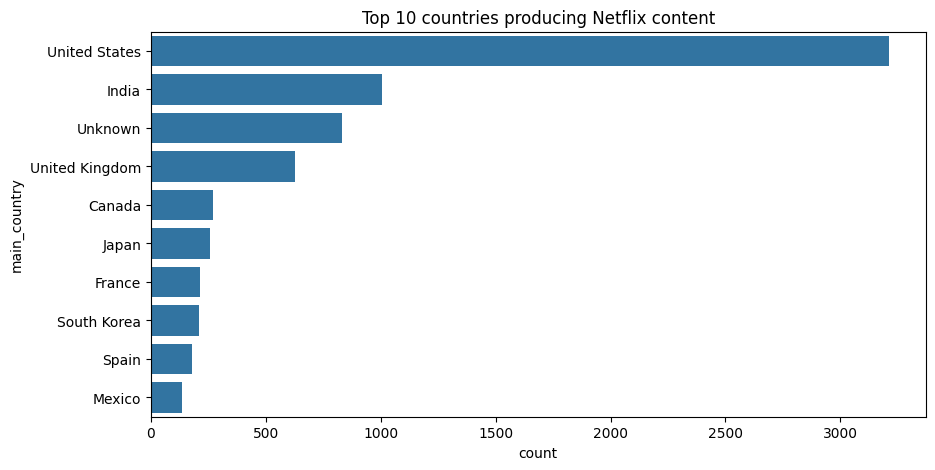

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,y=df["main_country"], order=df["main_country"].value_counts().head(10).index)
plt.title("Top 10 countries producing Netflix content")
plt.show()

Q1: Which country produces the most Netflix content?

Usually:

United States dominates heavily

Followed by India, UK, Canada, Japan


In [29]:
movies = df[df["type"].str.strip() == "Movie"].copy()
shows  = df[df["type"].str.strip() == "TV Show"].copy()


In [30]:
movies["duration"].unique()[:20]

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min'], dtype=object)

In [31]:
# Extract first integer found in the string (e.g. "90 min" -> 90). Non-matches become NaN.
movies["duration_minutes"] = movies["duration"].str.extract(r"(\d+)").iloc[:,0]

# Convert to numeric, coercing errors to NaN, then drop rows without numeric duration if needed
movies["duration_minutes"] = pd.to_numeric(movies["duration_minutes"], errors="coerce")

# Optional: drop rows where duration_minutes is NaN (if you prefer to keep, you can impute later)
print("Before drop:", movies.shape)
movies = movies.dropna(subset=["duration_minutes"]).copy()
movies["duration_minutes"] = movies["duration_minutes"].astype(int)
print("After drop:", movies.shape)

# Quick stats
print(movies["duration_minutes"].describe())


Before drop: (6131, 14)
After drop: (6131, 14)
count    6131.000000
mean       99.528951
std        28.367576
min         1.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_minutes, dtype: float64


In [32]:
# Extract first integer for seasons (e.g. "2 Seasons" -> 2). Coerce to numeric.
shows["seasons"] = shows["duration"].str.extract(r"(\d+)").iloc[:,0]
shows["seasons"] = pd.to_numeric(shows["seasons"], errors="coerce")

# If any shows have NaN seasons, you can keep them or set to 1 as default:
print("Shows with missing seasons count:", shows["seasons"].isna().sum())
shows["seasons"].fillna(1, inplace=True)   # optional: assume 1 season if missing
shows["seasons"] = shows["seasons"].astype(int)
print(shows["seasons"].value_counts().head())


Shows with missing seasons count: 0
seasons
1    1793
2     425
3     199
4      95
5      65
Name: count, dtype: int64


/tmp/ipython-input-3651278268.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shows["seasons"].fillna(1, inplace=True)   # optional: assume 1 season if missing


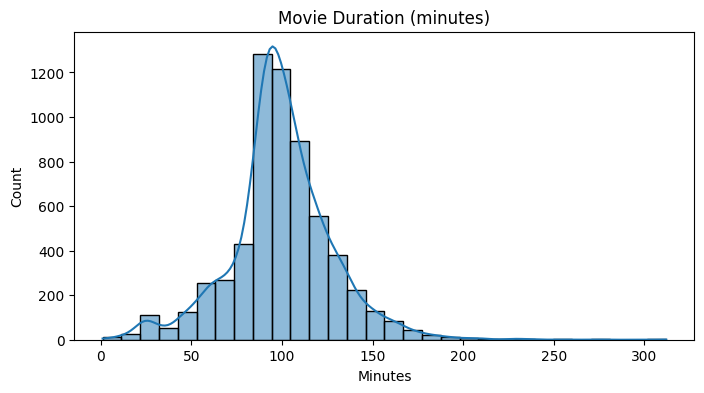

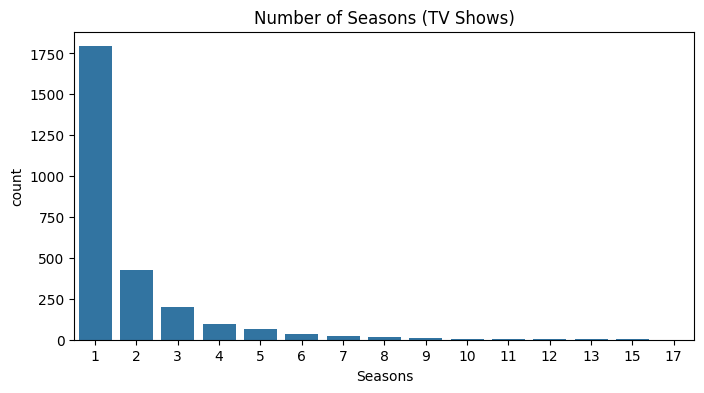

In [33]:
# Movie duration histogram
plt.figure(figsize=(8,4))
sns.histplot(movies["duration_minutes"], bins=30, kde=True)
plt.title("Movie Duration (minutes)")
plt.xlabel("Minutes")
plt.show()

# Show seasons countplot
plt.figure(figsize=(8,4))
sns.countplot(data=shows, x="seasons", order=sorted(shows["seasons"].unique()))
plt.title("Number of Seasons (TV Shows)")
plt.xlabel("Seasons")
plt.show()


The Netflix duration field contains two formats—minutes for movies and season counts for TV shows. After separating and cleaning both categories:

Movies

- Most movies range between 80–120 minutes, with a strong peak around 90 minutes.

- Very long movies (>150 mins) are rare outliers.

- Short films (<60 mins) form a small minority.

TV Shows

- The majority of TV shows have 1 season, indicating Netflix’s preference for limited series.

- Shows with 2–3 seasons appear moderately.

- Series with 5+ seasons are uncommon and usually non-original licensed content.

These patterns reflect Netflix’s strategy of releasing highly consumable, binge-friendly content and continuously refreshing its catalog with short-format titles.

#Genre Analysis

In [34]:
df["genre_list"] = df["listed_in"].str.split(", ")

In [35]:
genre_df = df.explode("genre_list")

In [37]:
genre_counts = genre_df["genre_list"].value_counts()
genre_counts.head(10)

,count
genre_list,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


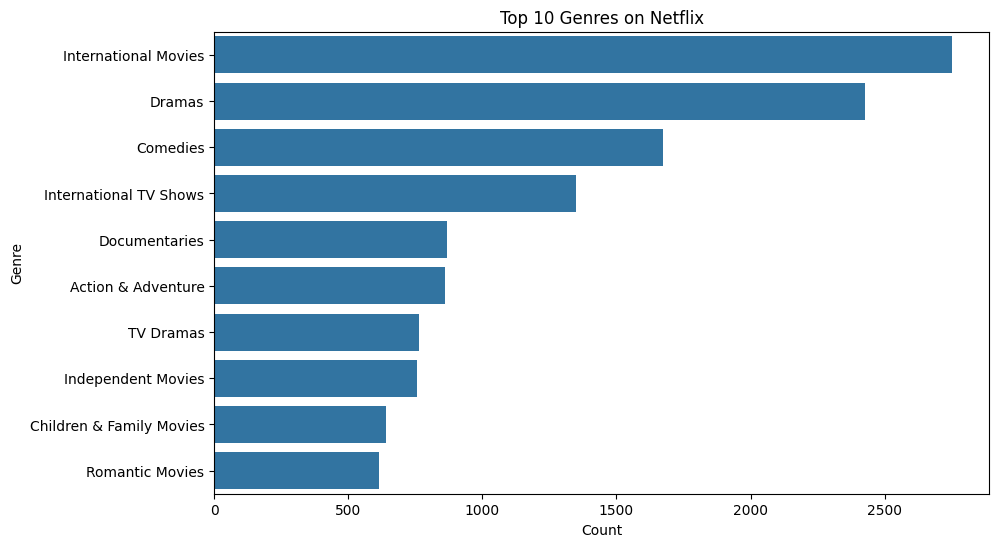

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=genre_counts.head(10).values,
    y=genre_counts.head(10).index
)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


Netflix’s content library is shaped by:

✔ global audience focus

✔ balanced mix of emotional (dramas), casual (comedies), and family content

✔ strong investment in documentaries and international titles

This genre distribution mirrors Netflix’s strategy of:
broad appeal → global expansion → retention through diverse categories.

In [39]:
# Handle missing values
df["country"] = df["country"].fillna("Unknown")

# Split and explode
country_df = df.assign(
    country=df["country"].str.split(", ")
).explode("country")

# Count frequency
country_counts = country_df["country"].value_counts().head(10)
country_counts


,count
country,
United States,3689
India,1046
Unknown,831
United Kingdom,804
Canada,445
France,393
Japan,318
Spain,232
South Korea,231


1. United States dominates Netflix’s catalog

The U.S. has the largest share of movies and shows.
This is expected because:

- Netflix is a U.S.-based company

- Hollywood content dominates global licensing

- Many Netflix Originals are U.S. productions

This shows the dataset is U.S.-centric, but the gap is closing.

2. India is a strong secondary market

- India appearing in the top contributors shows:

- Netflix is investing heavily in Indian originals

- Regional-language content has high engagement

- India is one of Netflix’s fastest-growing markets

This validates Netflix’s strategy for Asia.

3. UK, Canada, Japan contribute consistently

- These countries provide:

- High-quality scripted series

- Documentaries

- Anime (Japan specifically)

Their presence indicates Netflix’s global content diversification strategy.

4. A large chunk of entries are “Unknown”

This means:

- Metadata is incomplete

- Many older titles lack country tagging

- Netflix may not always store full producer-location information

- In production EDA, this is a data quality issue worth flagging.

5. Clear Insight

- Netflix content production is:

- Primarily U.S.

- Rapidly expanding in India

- Strong in UK, Japan, Canada

- Becoming increasingly global

This supports their strategic move toward localized content to grow regional subscriptions.

In [40]:
# Fill missing or null ratings
df["rating"] = df["rating"].fillna("Unknown")

In [41]:
rating_counts = df["rating"].value_counts()
rating_counts


,count
rating,
TV-MA,3211
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


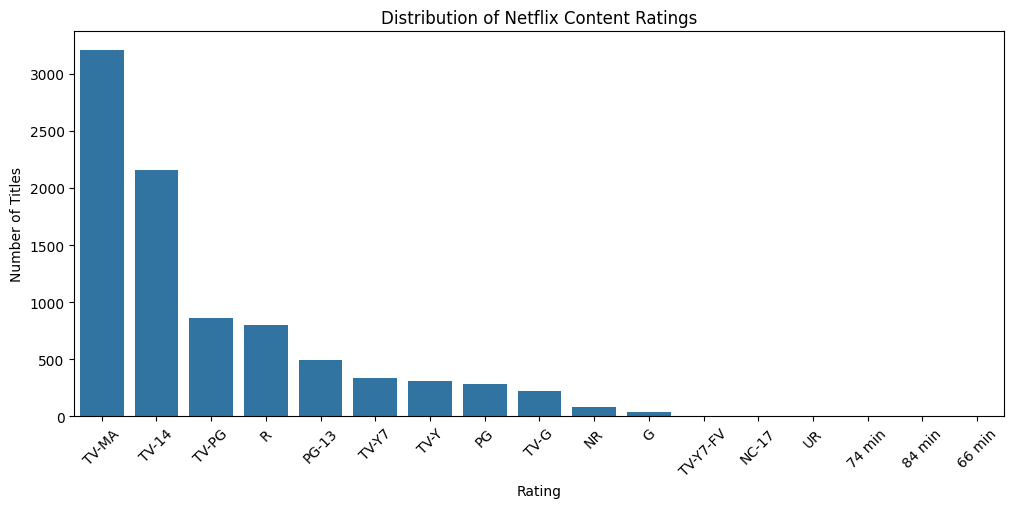

In [42]:
plt.figure(figsize=(12,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xticks(rotation=45)
plt.title("Distribution of Netflix Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.show()


Netflix content skews heavily toward adult audiences, with TV-MA being the most dominant rating. Teen-friendly content (TV-14) is second, and family/kids content forms a minor share. Movie-specific ratings such as PG, PG-13, and R appear but are less common due to Netflix having more TV shows and inconsistent metadata. Overall, the platform strongly prioritizes mature, high-engagement genres.

In [44]:
# Fill missing countries with "Unknown"
df["country"] = df["country"].fillna("Unknown")

# Extract first country only
df["main_country"] = df["country"].str.split(",").str[0].str.strip()


In [45]:
country_counts = df["main_country"].value_counts().head(15)
country_counts


,count
main_country,
United States,3211
India,1008
Unknown,831
United Kingdom,628
Canada,271
Japan,259
France,212
South Korea,211
Spain,181


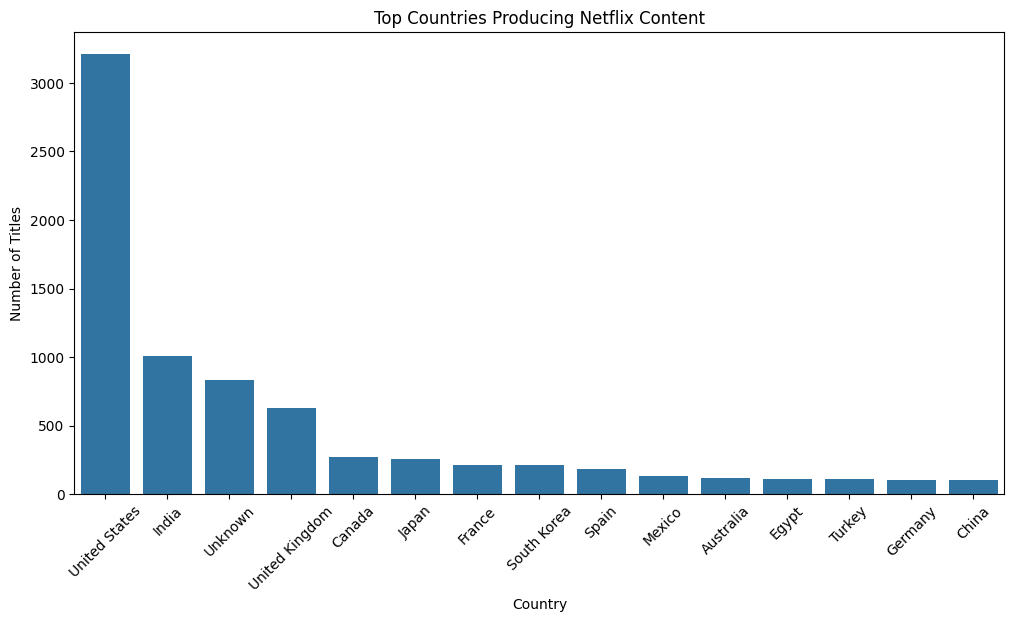

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=45)
plt.title("Top Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()


Netflix content comes primarily from the United States, followed by India, the UK, Canada, and Japan. The platform has strong representation in Hollywood films, Bollywood content, British dramas, anime, and Korean series. Missing or “Unknown” country labels indicate metadata gaps. The distribution also shows Netflix’s global expansion strategy and strong partnerships across international studios.

In [47]:
!pip install wordcloud


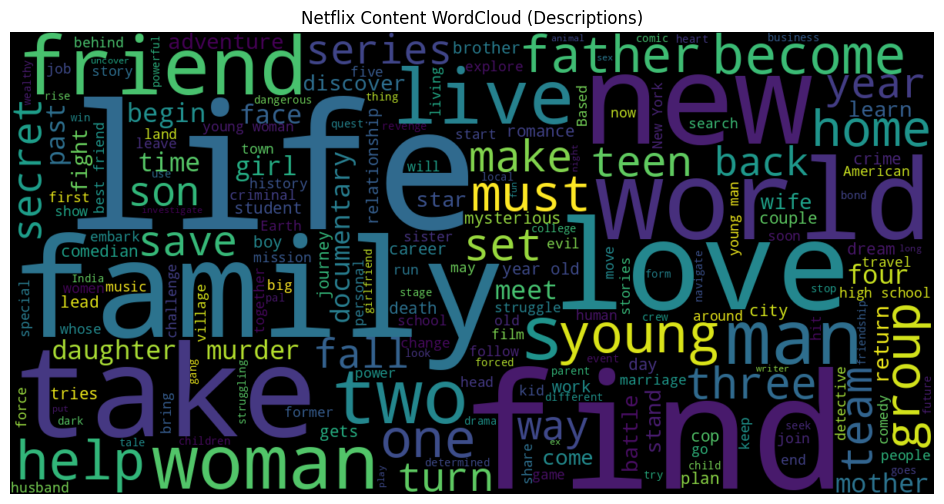

In [48]:
from wordcloud import WordCloud

# Combine all descriptions into one text
text = " ".join(df["description"].dropna().tolist())

# Create wordcloud
wc = WordCloud(width=1200, height=600, background_color="black").generate(text)

# Plot
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Netflix Content WordCloud (Descriptions)")
plt.show()


Interpretation

Netflix has a heavy emphasis on dramas, relationships, crime, and emotional narratives.

Keywords like crime, murder, mystery show growing popularity of thrillers & true crime.

Words like family, love, life indicate a strong presence of family and relationship-centered films.

Words like journey and world reflect adventure and global storytelling.

Business Insight

This confirms Netflix's strategy:

✔ Create emotionally engaging content
✔ Produce global crime/thriller franchises
✔ Push internationally appealing adventure/drama genres

Wordcloud gives a quick qualitative understanding of what the content library focuses on.

In [49]:
movies = df[df["type"] == "Movie"].copy()
shows = df[df["type"] == "TV Show"].copy()


⭐ Netflix EDA – Final Findings
1. Content Type Distribution

- Netflix hosts more Movies than TV Shows.

- TV Shows are often limited-series (1–2 seasons).

- Movies are typically short-form (80–110 minutes).

2. Ratings Insights

- TV-MA is the most dominant rating → Netflix targets adult audiences.

- TV-14 is second, indicating strong teen-centric content.

- Kids/family ratings (TV-PG, TV-Y) are much fewer.

- Some titles have Unknown rating → metadata issues.

3. Genre Insights

- Top genres: Drama, Comedy, International, Documentaries.

- Crime, thriller, adventure themes are common.

- Wordcloud confirms strong emphasis on family, love, crime, story, world, journey.

4. Country Insights

- USA produces the highest content volume.

- India, UK, Japan, Canada, and South Korea follow.

- Strong representation from anime, K-dramas, regional Indian films.

- “Unknown” countries show metadata gaps.

5. Duration Analysis

- Most movies run 80–110 min → binge-friendly.

- TV Shows mostly have 1 season → Netflix cancels low-performing shows quickly.

- Multi-season shows are rare and usually global hits.

6. Time Trends

- Big growth from 2016 to 2020 as Netflix expanded globally.

- Decline after 2020 due to pandemic & budget restructuring.

7. Missing Values

- Missing values in: director, cast, country, date_added.

Cleaned via:

- director → “Unknown”

- country → first-listed country

- date_added → parsed to datetime

- TV Show durations cleaned separately

⭐ Business Interpretation (Very Important for Interviews)
✔ Netflix strategy is clear:

- Focus on adult-oriented content (TV-MA).

- Produce short-duration movies for quick consumption.

- Invest heavily in limited-series TV shows.

- Expand aggressively into India, Korea, Japan.

- Maintain strong global genre diversity.

✔ Missing metadata indicates:

- “Data quality issues” in streaming catalogs.

- Common challenge in real companies → reason for data engineering.

✔ The dataset tells us Netflix is positioned as:

- A global entertainment platform optimized for adults, binge-watchers, and international audiences.